# Árvores de decisão: Comparação de árvores de regressão com regressão linear

## O que vamos ver?
- Comparar a precisão e o comportamento das árvores de decisão perante a regressão linear tradicional

Em algumas ocasiões estima-se que as árvores de regressão possam não ter tanta precisão e cair em mais sobreajuste perante a regressão linear tradicional, principalmente com um alto nº de características.

Neste exercício, vamos seguir os passos habituais para formar 2 modelos de regressão linear: uma árvore de decisão e um Lasso.

In [12]:
# TODO: Importar todos os módulos necessários para esta célula
import numpy as np
from sklearn.datasets import make_regression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle 
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold, cross_val_score


In [30]:
## Gerar um dataset sintético

#Gerar um dataset sintético com um termo de erro algo grande e bastantes características:

# TODO: Gerar um conjunto de dados sintéticos para regressão linear com um termo de erro

m = 1000
n = 19

X, Y, theta = make_regression(n_samples=m,  # Número de amostras
                              n_features=n,  # Número de variáveis independentes (features)
                              noise=20,       # Sem ruído
                              coef=True,     # Retorna os coeficientes verdadeiros
                              random_state=42)  # Para resultados reprodutíveis

In [14]:
X[:5, 5]

array([ 0.71481669,  0.519829  , -2.19364793,  0.7110461 , -1.07105368])

Se o seu ambiente de trabalho não tem recursos suficientes, reduz o nº de características a 9, p. ex.

## Pré-processar os dados

- Reordenar os dados aleatoriamente. 
- Normalizar.
- Dividi-los em subconjuntos de formação e testes

*Nota*: Mais uma vez, vamos utilizar a K-fold para a validação cruzada

In [15]:
# TODO: Reordenar os dados aleatoriamente

X, Y = shuffle(X, Y, random_state=42)
X[:5, 5]

array([ 1.09672421,  1.60284425,  1.7722516 , -0.44360683,  1.36432624])

In [16]:
# TODO: Normalizar os exemplos

scaler = MinMaxScaler().fit(X)
X = scaler.transform(X)
X[:5, 5]

array([0.64203003, 0.72147014, 0.74806015, 0.40026117, 0.68403259])

In [17]:
# TODO: Dividir os dataset e subset de formação e testes

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Otimizar os modelos por validação cruzada

- Formar um modelo por cada valor de regularização ou profundidade máx. a considerar. 
- Forma-os e avalia-os sobre uma divisão do subset de formação por K-fold.
- Escolhe o modelo e a sua regularização ótima.

Considerar uns parâmetros similares aos de exercícios passados:
- Profundidade máxima no intervalo [1, 8]
- Parâmetro de regularização L2 *alpha* no intervalo logarítmico [ [0, 0.1]: 0.1, 0.01, 0.001, 0.0001, etc.

Pode-se copiar as células de exercícios anteriores e modificá-las

In [18]:
# TODO: Formar um modelo diferente sobre um fold de K-fold diferente para a árvore de regressão e Lasso

# Itera sobre os splits, forma os seus modelos e avalia-os sobre o subset do CV
# As árvores de decisão e os modelos lineares de Lasso podem requerer um nº diferente de splits
mejor_tree = [3, 4, 5, 6, 7, 8] 
mejor_lasso = [0.1, 0.01, 0.001, 0.0001]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

tree_scores = []
lasso_scores = []

for max_depth in mejor_tree:
    model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    scores = cross_val_score(model, X, Y, cv=kf)
    print(scores)
    tree_scores.append(np.mean(scores))

print()

for alpha in mejor_lasso:
    model = Lasso(alpha=alpha)
    scores = cross_val_score(model, X, Y, cv=kf)
    print(scores)
    lasso_scores.append(np.mean(scores))

print()

print("Scores para Árvores de decisão:")
for i, scores in enumerate(tree_scores):
    print("Max-depth:", mejor_tree[i], "->", scores)

print()

print("Scores para Regressão Linear (Lasso):")
for i, scores in enumerate(lasso_scores):
    print("Alpha:", mejor_lasso[i], "->", scores)

[0.25486181 0.37350888 0.44832965 0.34267703 0.37731759]
[0.33756312 0.43772076 0.47232147 0.34368463 0.37440203]
[0.32850213 0.46395904 0.46187794 0.35121465 0.34670823]
[0.20572326 0.46623194 0.49847943 0.34607247 0.32290352]
[0.17450225 0.477276   0.4676998  0.31537916 0.35804046]
[0.23039402 0.49228367 0.49033819 0.25241816 0.32438942]

[0.98720117 0.98808819 0.9870242  0.98689297 0.98837796]
[0.98709271 0.98803776 0.98709006 0.98720812 0.98868525]
[0.98707428 0.98800275 0.98707689 0.98721982 0.98869571]
[0.9870722  0.98799891 0.98707536 0.9872208  0.98869672]

Scores para Árvores de decisão:
Max-depth: 3 -> 0.35933899225100274
Max-depth: 4 -> 0.3931384004427898
Max-depth: 5 -> 0.3904523987483257
Max-depth: 6 -> 0.3678821251404378
Max-depth: 7 -> 0.35857953436408296
Max-depth: 8 -> 0.35796469472049897

Scores para Regressão Linear (Lasso):
Alpha: 0.1 -> 0.9875168988235623
Alpha: 0.01 -> 0.9876227785113342
Alpha: 0.001 -> 0.9876138876657444
Alpha: 0.0001 -> 0.9876127979787942


## Avaliar o modelo sobre o subset de teste

Finalmente, vamos avaliar os melhores modelos de árvore de decisão e Lasso no subset de teste.

Para o fazer, calcular as suas métricas MSE e a pontuação R^2 e representar graficamente as previsões do modelo vs. o subset de teste:

In [19]:
# TODO: Avaliar o modelo com MSE e R^2 no subconjunto de teste para melhor árvore e Lasso
model_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
model_tree.fit(X_train, y_train)
y_test_pred_tree = model_tree.predict(X_test)

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)
y_test_pred_lasso = model_lasso.predict(X_test)

mse_tree = mean_squared_error(y_test, y_test_pred_tree)
r2_score_tree = r2_score(y_test, y_test_pred_tree)
print("Métricas para Árvores de decisão:")
print('Erro quadrático médio: %.2f' % mse_tree) 
print('Coeficiente de determinação: %.2f' % r2_score_tree)

print()

mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_score_lasso = r2_score(y_test, y_test_pred_lasso)
print("Métricas para Regressão Linear (Lasso):")
print('Erro quadrático médio: %.2f' % mse_lasso) 
print('Coeficiente de determinação: %.2f' % r2_score_lasso)

Métricas para Árvores de decisão:
Erro quadrático médio: 19949.75
Coeficiente de determinação: 0.34

Métricas para Regressão Linear (Lasso):
Erro quadrático médio: 388.71
Coeficiente de determinação: 0.99


Finalmente, comprovar o seu possível desvio ou sobreajuste e precisão final representando graficamente os resíduos de ambos os modelos:

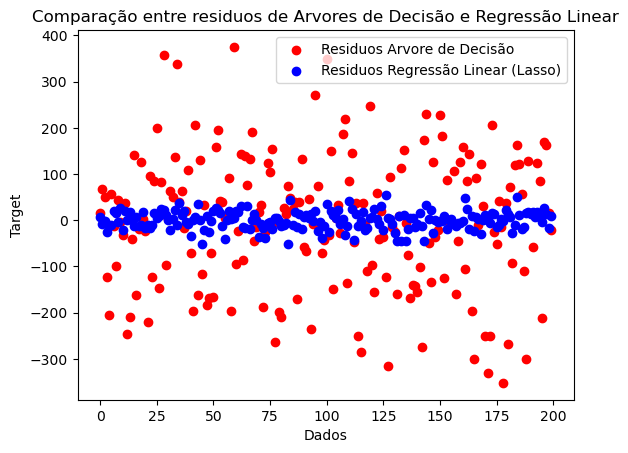

In [20]:
# TODO: Representar graficamente os resíduos de ambos os modelos

residuos_tree = y_test - y_test_pred_tree
residuos_lasso = y_test - y_test_pred_lasso

plt.figure(3)

plt.title("Comparação entre residuos de Arvores de Decisão e Regressão Linear")
plt.xlabel("Dados")
plt.ylabel("Target")

# Representar num gráfico de pontos, o subset de teste
plt.scatter(range(len(residuos_tree)), residuos_tree, color='red', label='Residuos Arvore de Decisão')
plt.scatter(range(len(residuos_lasso)), residuos_lasso, color='blue', label='Residuos Regressão Linear (Lasso)')

plt.legend()
plt.show()

*Há diferenças significativas entre ambos os modelos? O que ocorre se variamos o error ou o nº de características do dataset original, como respondem ambos os tipos de modelos?* 

Para o caso da árvore de regressão, talvez não tenhamos feito a comparação mais justa, posto que fiquem outros hiper-parâmetros que podemos modificar [sklearn.tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

## *Bonus*: Otimização de todos os hiper-parâmetros da árvore de decisão

*Atreve-se a usar [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) não apenas para otimizar max_depth, mas para todos os hiper-parâmetros da árvore de regressão?*

Na página da documentação de GridSearchCV tem um exemplo que pode tomar como referência.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros a testar
parameters = {
    'max_depth': [2, 3, 4, 5],
    'criterion': ['squared_error', 'friedman_mse'],
    'min_samples_split': [2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

# Modelo base
tree = DecisionTreeRegressor(random_state=42)

# Grid Search com validação cruzada
clf = GridSearchCV(tree, parameters, cv=5)
clf.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6]})

### Vizualizar melhor resultado

In [26]:
print("Melhores parâmetros encontrados:")
print(clf.best_params_)

print("Melhor score (accuracy média):")
print(clf.best_score_)

print()

print("RESULTADOS")
print(clf.cv_results_)

Melhores parâmetros encontrados:
{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 6}
Melhor score (accuracy média):
0.26360289169324724

RESULTADOS
{'mean_fit_time': array([0.00339131, 0.0031908 , 0.00279317, 0.00498734, 0.00337563,
       0.00281596, 0.00299125, 0.00219393, 0.00239367, 0.0022347 ,
       0.00261416, 0.00205307, 0.00263977, 0.00261669, 0.00244765,
       0.00240436, 0.00239482, 0.00259323, 0.00299354, 0.0028183 ,
       0.0030158 , 0.00279775, 0.0028316 , 0.00304995, 0.00140333,
       0.0016099 , 0.00183492, 0.00160747, 0.00164924, 0.00161452,
       0.00219464, 0.00206599, 0.00200334, 0.00203032, 0.00222697,
       0.00206914, 0.00246892, 0.002424  , 0.00222888, 0.0024498 ,
       0.00263238, 0.00266604, 0.00287585, 0.00266409, 0.00282035,
       0.00261211, 0.00282054, 0.00283089]), 'std_fit_time': array([7.97486667e-04, 3.98850566e-04, 3.99400825e-04, 3.98881447e-03,
       2.58400710e-03, 7.85103323e-04, 8.92070333e-04, 3

### Vizualizar todos os resultados

In [27]:
from pprint import pprint

print("Chaves dos resultados:")
pprint(sorted(clf.cv_results_.keys()))  # Ver o que tens disponível

# Exemplo de resultado por configuração
for mean, params in zip(clf.cv_results_['mean_test_score'], clf.cv_results_['params']):
    print(f"{params} --> Média de acerto: {mean:.4f}")

Chaves dos resultados:
['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_split',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']
{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 2} --> Média de acerto: 0.0414
{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 4} --> Média de acerto: 0.0414
{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_split': 6} --> Média de acerto: 0.0414
{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 2} --> Média de acerto: 0.0414
{'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'log2', 'min_samples_split': 4} --> Média de acerto: 0.0414
{'criterion': 'sq